In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
%cd ..
import torch
from segment_anything import sam_model_registry
from torch.nn import functional as F
import cv2
import numpy as np
from matplotlib import pyplot as plt

from src.point_prompt_demo import PointPromptDemo

/repo


In [3]:
medsam_ckpt_path = "weights/medsam/medsam_vit_b.pth"
medsam_model = sam_model_registry['vit_b'](checkpoint=medsam_ckpt_path)
device = "cuda:0"

medsam_model = medsam_model.to(device)
point_medsam_ckpt_path = "logs/04-07-2024-12:11:12-epoch=81-loss_val=0.06.ckpt"
checkpoint = torch.load(point_medsam_ckpt_path)
medsam_model.load_state_dict(checkpoint['state_dict'], strict=False)

medsam_model.eval()

point_prompt_demo = PointPromptDemo(medsam_model)

In [4]:
demo_file_img = "data/WORD/test_CT_Abd/imgs/CT_Abd_word_0014-000.npy"
demo_file_gt = "data/WORD/test_CT_Abd/gts/CT_Abd_word_0014-000.npy"

img = np.load(demo_file_img)
gt = np.load(demo_file_gt)

In [5]:
point_prompt_demo.set_image(img)

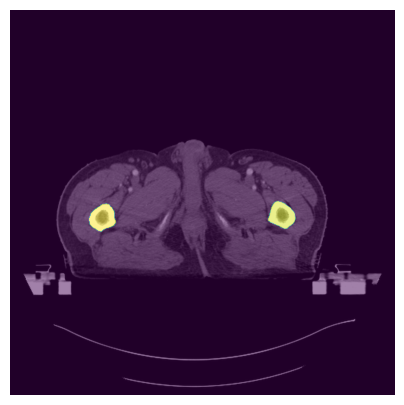

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.imshow(img, cmap='gray')
ax.imshow(gt, alpha=0.5, cmap='viridis')
ax.axis('off')
plt.show()

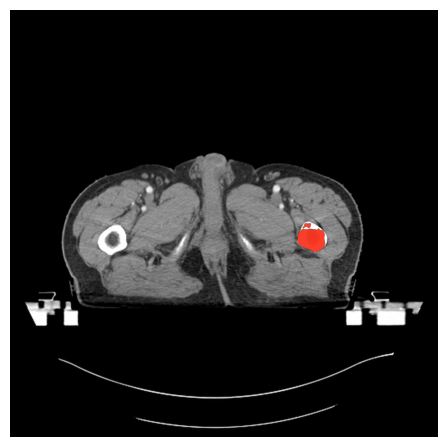

In [7]:
seg = point_prompt_demo.infer(gt, num_points=10)
point_prompt_demo.show(seg)

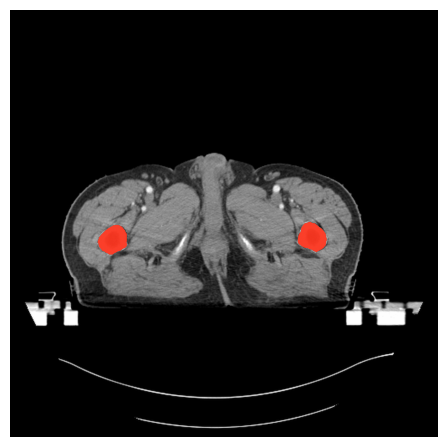

In [8]:
seg = point_prompt_demo.infer(gt, num_points=20, prop_out=0.95)
point_prompt_demo.show(seg)

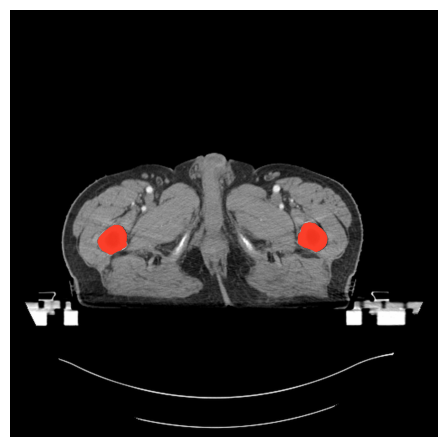

In [9]:
seg = point_prompt_demo.infer(gt, num_points=20)
point_prompt_demo.show(seg)

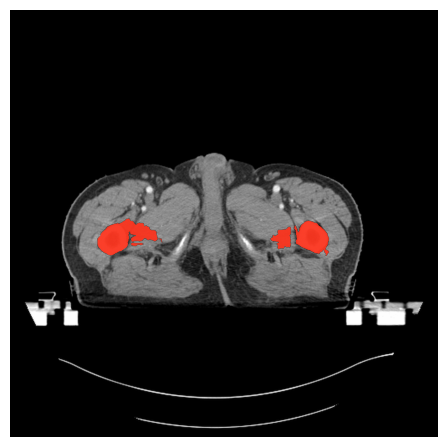

In [10]:
seg = point_prompt_demo.infer(gt, num_points=90)
point_prompt_demo.show(seg)